### TODO:-
1. add gc
2. add stemming nd lemmatization 

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from bs4 import BeautifulSoup

In [2]:
path0 = '/content/drive/MyDrive/final year project/Code/Reviews.csv'
path1 = 'Dataset/Reviews.csv'
data = pd.read_csv(path1)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Counting number of datasets and attributes of table

In [3]:
print('There are',data.shape[0],'observations and',data.shape[1] ,'features in this dataset.')

There are 568454 observations and 10 features in this dataset.


**Count number of positive, negative or neutral reviews**

## Binarising the dataset

In [4]:
def separate(x):
  if x < 3:
    return 0
  return 1

data['Value']=data['Score'].apply(separate)
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Value
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


**Find all the duplicated rows of the dataset**

In [5]:
data[data.duplicated(subset=['ProductId','ProfileName','Score','Time','Summary'],keep= False)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Value
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",1
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",1
1084,1085,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,3,3,1,1330992000,awful,"This is not jerky, this is processed, hard lik...",0
1087,1088,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,1,1,1,1330992000,awful,"This is not jerky, this is processed, hard lik...",0
2630,2631,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,1,1,2,1313107200,Way too weak for my tastes,"What can i say, I love iced tea. I drink a lot...",0
...,...,...,...,...,...,...,...,...,...,...,...
568007,568008,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,3,3,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,1
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568034,568035,B0030VJ8YU,A1S6HK2R1KUC5E,data1701,1,1,5,1318291200,Triplets love this!,This is very smooth and easy to feed to my tri...,1


**Find all the duplicated rows of a particular product Id**

In [6]:
data[data.duplicated(subset=['ProductId','ProfileName','Score','Time','Summary'],keep= False)].loc[data.ProductId == 'B0030VJ8YU',:]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Value
567934,567935,B0030VJ8YU,A1S6HK2R1KUC5E,data1701,0,0,5,1318291200,Triplets love this!,This is great! It smells great! I love all o...,1
567935,567936,B0030VJ8YU,A1S6HK2R1KUC5E,data1701,0,0,5,1318291200,Triplets love this!,This food is great! My triplets love it. I t...,1
567957,567958,B0030VJ8YU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...,1
567958,567959,B0030VJ8YU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...,1
567984,567985,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",8,8,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,1
568007,568008,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,3,3,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,1
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568034,568035,B0030VJ8YU,A1S6HK2R1KUC5E,data1701,1,1,5,1318291200,Triplets love this!,This is very smooth and easy to feed to my tri...,1
568053,568054,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,1,1,5,1274486400,These pouches are great!,These pouches are so easy and convenient. The...,1


# **Data cleaning**

**Sorting data according to Product Id in ascending order**

In [7]:
data=data.sort_values('ProductId',axis=0,ascending=True, inplace=False, na_position='last')
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Value
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,1
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1


**Keep the first similar product review and delete the other**

In [8]:
data= data.drop_duplicates(subset={'UserId','ProfileName','Time','Summary','Text'},keep='first', inplace = False)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Value
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,1
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1


**Deleting unnecessary columns**

In [9]:
data = data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], axis=1)
data.shape

(395172, 4)

In [10]:
data.head()

,Score,Summary,Text,Value
150528,4,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,1
150506,4,chicken soup with rice months,This is a fun way for children to learn their ...,1
150505,4,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150504,4,A classic,Get the movie or sound track and sing along wi...,1
150503,4,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1


# Data preprocessing

**Decontraction**

In [11]:
import re
def decontracted(phrase):
  phrase = re.sub(r"won't", "will not",phrase)
  phrase = re.sub(r"can\'t","can not",phrase)
  
  phrase = re.sub(r"n\'t"," not",phrase)
  phrase = re.sub(r"\'re"," are",phrase)
  phrase = re.sub(r"\'s"," is",phrase)
  phrase = re.sub(r"\'d"," would",phrase)
  phrase = re.sub(r"\'ll"," will",phrase)
  phrase = re.sub(r"\'t"," not",phrase)
  phrase = re.sub(r"\'ve"," have",phrase)
  phrase = re.sub(r"\'m"," am",phrase)

  return phrase

**Store the stopwords**

In [12]:
stopwords= set(['br','the','i','me','myself','we','my','our','ours','ourselves','you',"you're","you've",\
                "you'll","you'd","your",'yours','yourself','yourselves','he','him','his','himself',\
                'she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their',\
                'theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those',\
                'am','is','are','was','were','be','been','being','have','has','had','having','do','does',\
                'did','doing','a','an','the','and','but','if','or','because','as','until','while','of',\
                'at','by','for','with','about','against','between','into','through','during','before','after',\
                'above','below','to','from','up','down','in','out','on','off','over','under','again','further',\
                'then','once','here','there','when','where','why','how','all','any','both','each','few','more',\
                'most','other','some','such','only','own','same','so','than','too','very',\
                's','t','can','will','just','don','dont','should',"should've",'now','d','ll','m','o','re',\
                've','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',\
                "mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",\
                'won',"won't",'wouldn',"wouldn't"])

**Remove URL, HTML tags, punctuations, special characters and white spaces**

**Remove alpha numeric characters**

**Remove stopwords and convert everything to lowercase**

from tqdm import tqdm
preprocess_review=[]
for sentance in tqdm(withoutduplicate_data['Text'].values):
  sentance = re.sub(r"http\S+","",sentance)
  sentance = BeautifulSoup(sentance,'lxml').get_text()
  sentance = decontracted(sentance)
  sentance = re.sub("\S*\d\S*", "",sentance).strip()
  sentance = re.sub('[^A-Za-z]+',' ',sentance)
  sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
  preprocess_review.append(sentance.strip())

In [13]:
import re
def remove_html_tags(sentance):
  clean=re.compile('<.*?>')
  sentance=re.sub(clean,' ',sentance)
  return sentance
data['Preprocessed_review']=data['Text'].apply(remove_html_tags)
data.head(5)

,Score,Summary,Text,Value,Preprocessed_review
150528,4,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,1,In June I saw a charming group of roses all be...
150506,4,chicken soup with rice months,This is a fun way for children to learn their ...,1,This is a fun way for children to learn their ...
150505,4,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1,"I grew up reading these Sendak books, and watc..."
150504,4,A classic,Get the movie or sound track and sing along wi...,1,Get the movie or sound track and sing along wi...
150503,4,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1,A very entertaining rhyming story--cleaver and...


In [18]:
def preprocess(sentance):
  sentance = re.sub(r"http\S+"," ",sentance)
  #sentance = BeautifulSoup(sentance,'lxml').get_text()
  sentance = decontracted(sentance)
  sentance = re.sub("\S*\d\S*", " ",sentance).strip()
  sentance = re.sub('[^A-Za-z]+',' ',sentance)
  sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
  stemmer = nltk.porter.PorterStemmer()
  sentance = ' '.join([stemmer.stem(token) for token in sentance.split()])
  return sentance

data['Preprocessed_review']=data['Text'].apply(preprocess)
data.head(5)

,Score,Summary,Text,Value,Preprocessed_review
150528,4,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,1,june saw charm group rose begin droop pep chic...
150506,4,chicken soup with rice months,This is a fun way for children to learn their ...,1,fun way children learn month year learn poem t...
150505,4,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1,grew read sendak book watch realli rosi movi i...
150504,4,A classic,Get the movie or sound track and sing along wi...,1,get movi sound track sing along carol king gre...
150503,4,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1,entertain rhyme stori cleaver catchi illustr i...


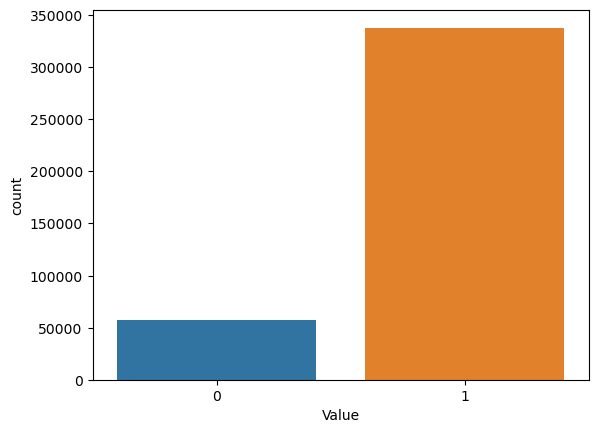

In [19]:
sns.countplot(x=data['Value']) 
plt.show()

In [20]:
data.to_csv('Dataset/preprocessed.csv')